In [1]:
import mne
from scipy.io import loadmat
import numpy as np

In [2]:
def file_to_data(fileName):
    chnames = ['Fp1','Fp2','Fc5','Fz','Fc6','T7','Cz','T8','P7','P3','Pz','P4','P8','O1','Oz','O2','stim']
    chtypes = ['eeg'] * 16 + ['stim']
    info = mne.create_info(ch_names=chnames, sfreq=512,ch_types=chtypes, montage='standard_1020',verbose=False)
    data = loadmat(fileName)["SIGNAL"]
    #On modifie pour avoir un dataset avec 1 : yeux ouvert et -1 yeux fermée
    new_data=[]
    yeux_ouvert=False
    for k in range(len(data)):
        if(yeux_ouvert==False):
            tmp=np.append(data[k][1:17],-1)
        else:
            tmp=np.append(data[k][1:17],1)
        new_data.append(tmp)
        if(data[k][17]==1):
            yeux_ouvert=True
        if(data[k][18]==1):
            yeux_ouvert=False
    labels= [d[16] for d in new_data]
    donnees = [d[:16] for d in new_data]
    return donnees,labels

In [3]:
donnees,labels = file_to_data("data/subject_01.mat")

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [27]:
#validation croisée Perceptron
#tol =1e-1 condition d'arret
tab_f1_score=[]
tab_pourcentage_train=[]
for k in range(4,25):
    tab_pourcentage_train.append( ( (k-1)/k )*100 )
    print(str(( (k-1)/k )*100)+"% du dataset pour le train")
    clf = SGDClassifier(loss="perceptron", eta0=1e-4, learning_rate="constant", penalty=None,tol=1e-1,max_iter=10000,shuffle=True)
    y_pred = cross_val_predict(clf,donnees,labels,cv=k)
    rapport = classification_report(labels, y_pred,output_dict=True)
    print("F1 Score : "+str(rapport['micro avg']["f1-score"]))
    tab_f1_score.append(rapport['micro avg']["f1-score"])
print(rapport)

75.0% du train
0.5977397168803419
80.0% du train
0.5954443776709402
83.33333333333334% du train
0.6793786725427351
85.71428571428571% du train
0.5825237045940171
87.5% du train
0.7053869524572649
88.88888888888889% du train
0.5804537259615384
90.0% du train
0.6856971153846154
90.9090909090909% du train
0.6340645032051282
91.66666666666666% du train
0.6287393162393162
92.3076923076923% du train
0.6840444711538461
92.85714285714286% du train
0.7242588141025641
93.33333333333333% du train
0.7243589743589743
93.75% du train
0.7071564503205128
94.11764705882352% du train
0.6699636084401709
94.44444444444444% du train
0.7448667868589743
94.73684210526315% du train
0.7499749599358975
95.0% du train
0.7332732371794872
95.23809523809523% du train
0.7487813835470084
95.45454545454545% du train
0.743739983974359
95.65217391304348% du train
0.7444160657051283
95.83333333333334% du train
0.7841379540598291
{'-1.0': {'precision': 0.8457442560102234, 'recall': 0.8165484268969772, 'f1-score': 0.830889

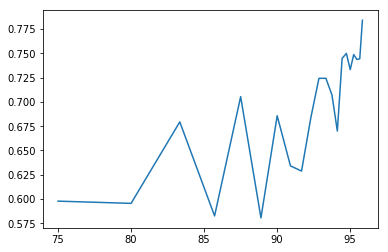

In [30]:
plt.plot(tab_pourcentage_train,tab_f1_score)
plt.show()